In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

In [3]:
#生成数据集
n_train,n_test,true_w,true_b = 100,100,[1.2,-3.4,5.6],5
features = torch.randn((n_train+n_test,1))
poly_features = torch.cat((features,torch.pow(features,2),
                          torch.pow(features,3)),1)
labels = (true_w[0]*poly_features[:,0]+true_w[1]*poly_features[:,1]+
         true_w[2]*poly_features[:,2]+true_b)
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)


In [4]:
#定义训练测试模型
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None,
    y2_vals=None,legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [6]:
num_epochs, loss = 100, torch.nn.MSELoss() 
def fit_and_plot(train_features, test_features, train_labels,test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear⽂文档可知，pytorch已经将参数初始化了
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size,shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss',test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,'\nbias:', net.bias.data)

final epoch: train loss 0.00010946762631647289 test loss 0.00010924357047770172
weight: tensor([[ 1.1971, -3.4004,  5.6000]]) 
bias: tensor([4.9998])


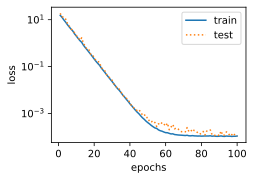

In [7]:
#正常三阶多项式函数
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],labels[:n_train], labels[n_train:])

final epoch: train loss 132.9349365234375 test loss 1185.623046875
weight: tensor([[19.2294]]) 
bias: tensor([0.9979])


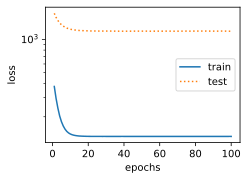

In [8]:
#线性函数欠拟合
fit_and_plot(features[:n_train, :], features[n_train:, :],labels[:n_train],labels[n_train:])

final epoch: train loss 2.639329671859741 test loss 2043.917236328125
weight: tensor([[ 0.5596,  0.1436, -0.2104]]) 
bias: tensor([2.9402])


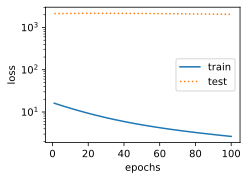

In [10]:
#训练样本不足过拟合
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],labels[0:2],labels[n_train:])